In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [7]:
data = pd.read_csv('Titanic-Dataset.csv')

In [9]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
print(data.shape)

(891, 12)


In [13]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
data = data.drop("Cabin",axis=1)

In [21]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [29]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [27]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [31]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
data['Sex'] = data['Sex'].map({'male':0,'female':1})

In [35]:
data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [37]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

In [39]:
data['Embarked'] = data['Embarked'].map({'C':0,'Q':1,'S':2})

In [47]:
data['Embarked']

0      2.0
1      0.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    2.0
888    2.0
889    0.0
890    1.0
Name: Embarked, Length: 891, dtype: float64

In [43]:
am, asd = data['Age'].mean(), data['Age'].std()
data['Age'] = (data['Age'] - am) / asd

In [45]:
fm, fsd = data['Fare'].mean(), data['Fare'].std()
data['Fare'] = (data['Fare'] - fm) / fsd

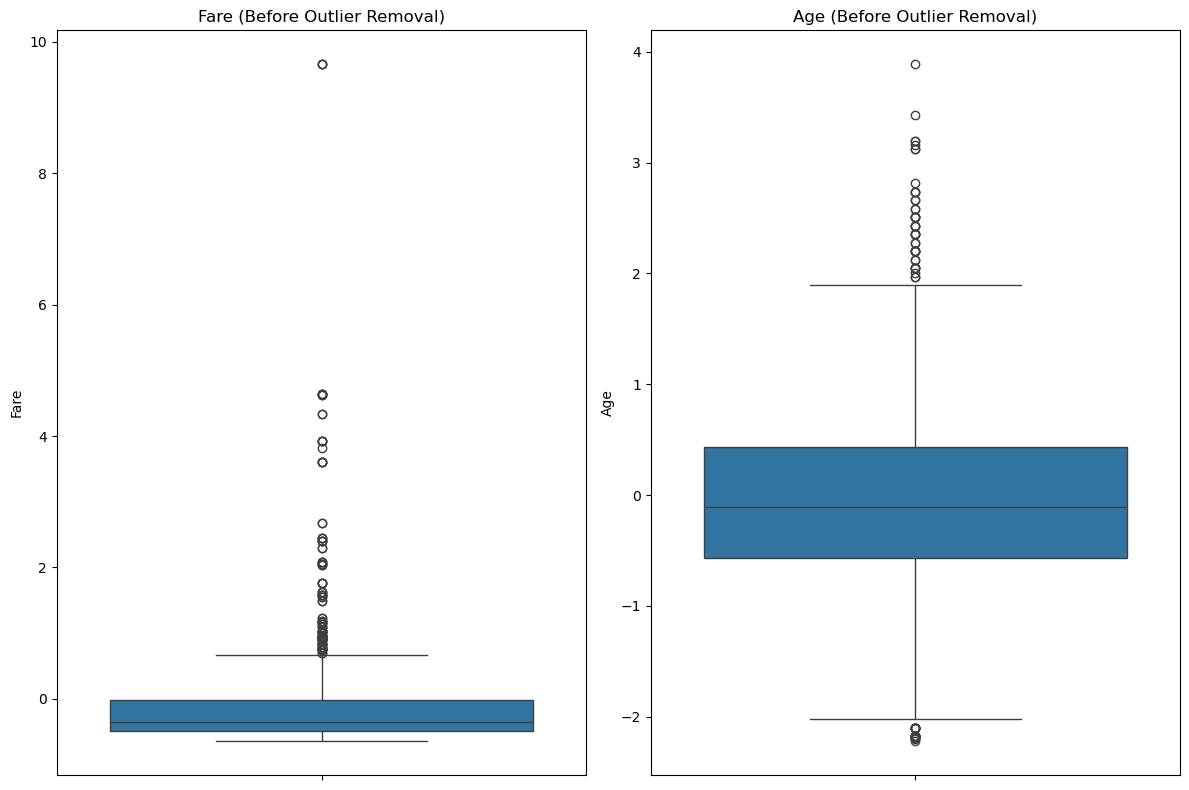

In [49]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sn.boxplot(y=data['Fare'])
plt.title("Fare (Before Outlier Removal)")

plt.subplot(1, 2, 2)
sn.boxplot(y=data['Age'])
plt.title("Age (Before Outlier Removal)")

plt.tight_layout()
plt.show()

In [51]:
def remove_outliers(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

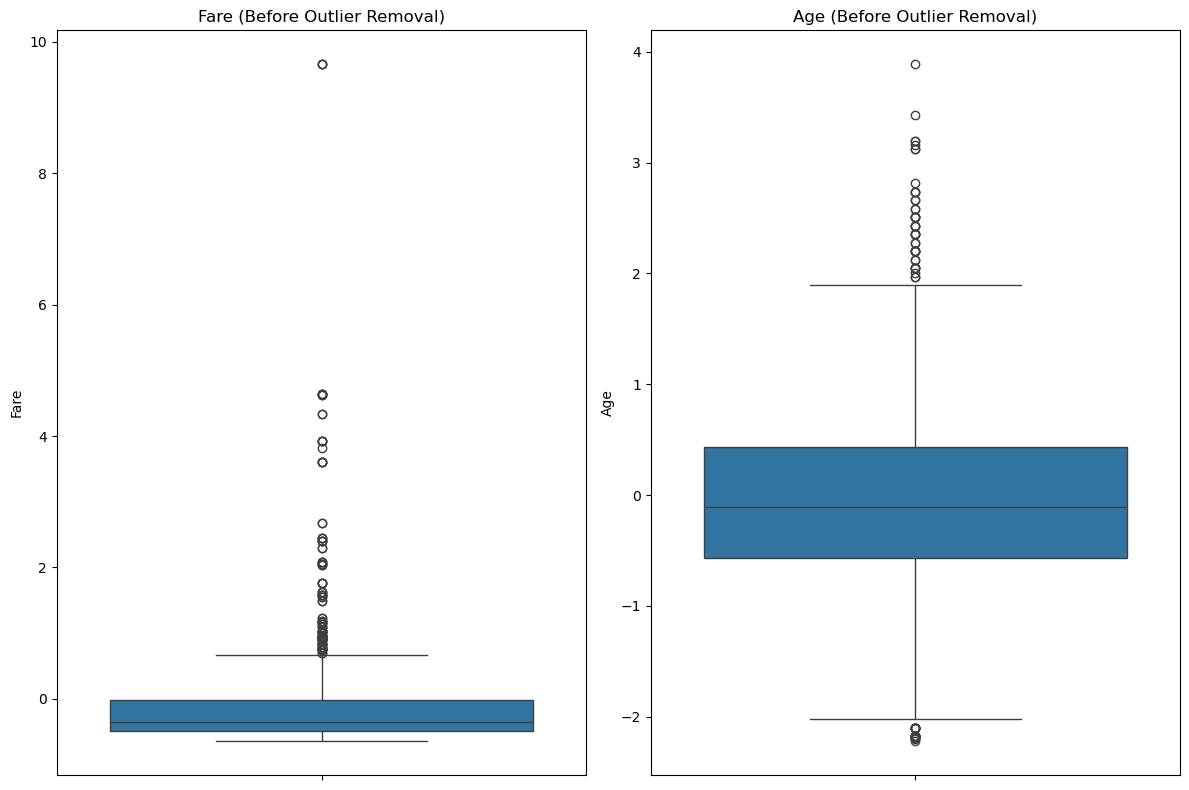

In [53]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sn.boxplot(y=data['Fare'])
plt.title("Fare (Before Outlier Removal)")

plt.subplot(1, 2, 2)
sn.boxplot(y=data['Age'])
plt.title("Age (Before Outlier Removal)")

plt.tight_layout()
plt.show()

In [55]:
x=data.drop("Survived",axis=1)
y=data["Survived"]

In [23]:
print("Cleaned data")
print(x.head())

Cleaned data
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex       Age  SibSp  Parch            Ticket      Fare  Embarked  
0    0 -0.565419      1      0         A/5 21171 -0.502163       2.0  
1    1  0.663488      1      0          PC 17599  0.786404       0.0  
2    1 -0.258192      0      0  STON/O2. 3101282 -0.488580       2.0  
3    1  0.433068      1      0            113803  0.420494       2.0  
4    0  0.433068      0      0            373450 -0.486064       2.0  
